# Projeto Final C.D.
## Clusterização de jogadores do Fifa 17

## Objetivo:
Como objetivo do projeto, buscamos criar um cluster que separe os jogadores em grupos (atacantes, meia-atacante, meia-defensivo, defesa e goleiro), a partir da definição da combinação de  3 critérios que estipulam a ofensividade, defensividade e habilidade como goleiro de cada jogador. Com a combinção dos 3 critérios encontrados será possível definir o grupo ideal de cada jogador. 

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [2]:
# https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/

# link tutorial de clusterização usando python e algoritimo de K-means

In [3]:
#Lendo banco de dados
dados=pd.read_excel("FUT_17_Players.xlsx", sep=',')


In [4]:
dados.shape

(14501, 78)

In [5]:
dados.head()

,id,commonName,firstName,headshotImgUrl,lastName,league,nation,club,headshot,specialImages,...,rawAttributeChemistryBonus,isLoan,squadPosition,itemType,discardValue,modelName,baseId,rating,created_at,updated_at
0,190043,Pelé,Edson,https://fifa17.content.easports.com/fifa/fltOn...,Arantes Nascimento,2118,54,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,190043,95,2016-09-21 16:33:58,2016-09-21 16:33:58
1,20801,Cristiano Ronaldo,C. Ronaldo,https://fifa17.content.easports.com/fifa/fltOn...,dos Santos Aveiro,53,38,243,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:147:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,20801,94,2016-09-21 16:33:58,2016-09-21 16:33:58
2,158023,NaN,Lionel,https://fifa17.content.easports.com/fifa/fltOn...,Messi,53,52,241,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,158023,93,2016-09-21 16:33:58,2016-09-21 16:33:58
3,168473,NaN,Franz,https://fifa17.content.easports.com/fifa/fltOn...,Beckenbauer,2118,21,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,168473,93,2016-09-21 16:33:58,2016-09-21 16:33:58
4,1109,NaN,Paolo,https://fifa17.content.easports.com/fifa/fltOn...,Maldini,2118,27,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:146:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,1109,92,2016-09-21 16:33:58,2016-09-21 16:33:58


In [6]:
n=0
for h in dados.columns:
    print (h, " - coluna:",n)
    n=n+1    

id  - coluna: 0
commonName  - coluna: 1
firstName  - coluna: 2
headshotImgUrl  - coluna: 3
lastName  - coluna: 4
league  - coluna: 5
nation  - coluna: 6
club  - coluna: 7
headshot  - coluna: 8
specialImages  - coluna: 9
position  - coluna: 10
playStyle  - coluna: 11
playStyleId  - coluna: 12
height  - coluna: 13
weight  - coluna: 14
birthdate  - coluna: 15
age  - coluna: 16
acceleration  - coluna: 17
aggression  - coluna: 18
agility  - coluna: 19
balance  - coluna: 20
ballcontrol  - coluna: 21
foot  - coluna: 22
skillMoves  - coluna: 23
crossing  - coluna: 24
curve  - coluna: 25
dribbling  - coluna: 26
finishing  - coluna: 27
freekickaccuracy  - coluna: 28
gkdiving  - coluna: 29
gkhandling  - coluna: 30
gkkicking  - coluna: 31
gkpositioning  - coluna: 32
gkreflexes  - coluna: 33
headingaccuracy  - coluna: 34
interceptions  - coluna: 35
jumping  - coluna: 36
longpassing  - coluna: 37
longshots  - coluna: 38
marking  - coluna: 39
penalties  - coluna: 40
positioning  - coluna: 41
potentia

In [7]:
#teste de clusterização básica (flat clustering)

#sklearn recebe os dados no formato numpy array
X = np.array([[1, 2],     
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


kmeans = KMeans(n_clusters=2) #inicializa o número de clusters
kmeans.fit(X)   #"fit" da data (learning) 

centroids = kmeans.cluster_centers_ #pegando os valores das centroides do "fiting"
labels = kmeans.labels_ #labels que o programa deu 

print(centroids)
print(labels)

[[ 1.16666667  1.46666667]
 [ 7.33333333  9.        ]]
[0 1 0 1 0 1]


coordinate: [ 1.  2.] label: 0
coordinate: [ 5.  8.] label: 1
coordinate: [ 1.5  1.8] label: 0
coordinate: [ 8.  8.] label: 1
coordinate: [ 1.   0.6] label: 0
coordinate: [  9.  11.] label: 1


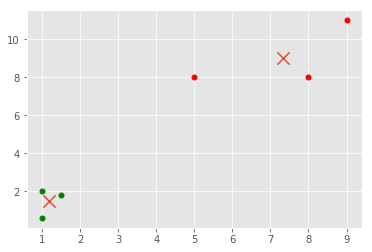

In [8]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

#observando alguns resultados do cluster

# a lista de cores é uma lista que fornecemos para a máquina 
# escolher durante a classificação para facilitar a visualização
# neste caso só foram necessárias duas mas dependendo da quantidade
# de clusters podemos precisar de mais.

#novamente os labels são os nomes de cada grupo que o programa deu


In [9]:
#após a primeira iteração podem ser feitas uma série de implementções
#como cluster multi dimensional e hierárquico.
#demonstrarei mais a seguir.

In [10]:
#Para implementar o clusterização hierárquica usaremos o algoritmo
#chamado "mean shift" (deslocamento de média) 

from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs

In [11]:
#criando um dataset para o exemplo usando make_blobs
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

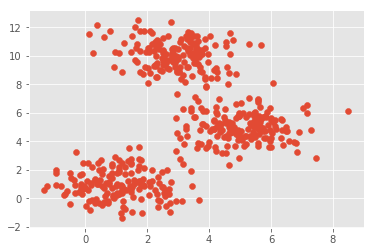

In [12]:
#visualizando os dados gerados em volta dos pontos de centro:

plt.scatter(X[:,0],X[:,1])
plt.show()

In [13]:
#agora queremos que a máquina reconheça os 3 clusters existentes

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

#inicializamos o mean shift e fazemos um "fit" do dataset.
#agora fazemos a máquina gerar os labels e os clusters points
#esses labels são diferentes do unpacked-y

In [14]:
#agora comparamos os centros dos clusters gerados pela análise da
#máquina com os que demos input para verificar a precisão.

print("centros de clusters estimados:")
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)
print("")
print("centros de cluster original:")
print(centers)

centros de clusters estimados:
[[  1.07276329   0.9751281 ]
 [  5.01382696   5.00582116]
 [  2.97649005  10.0064381 ]]
Number of estimated clusters: 3

centros de cluster original:
[[1, 1], [5, 5], [3, 10]]


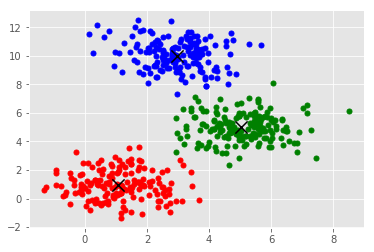

In [15]:
#vê-se uma proximidade exelente entre os centros gerados e originais

colors = 10*['r.','g.','b.','c.','k.','y.','m.'] #lista de cores para o gráfico

#visualizando os dados:

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [16]:
#vemos então que nosso programa conseguiu clusterizar os dados
#extremamente bem (próximo do modelo original)!

[[ 5.06693957  4.97830189  5.08467871]
 [ 3.01813765  9.84360676  9.7202088 ]
 [ 1.19245077  0.96844006  1.03884093]]
Number of estimated clusters: 3


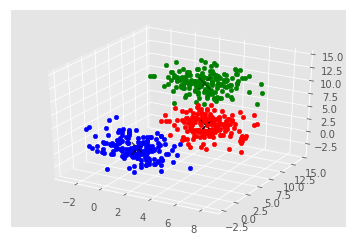

In [17]:
#agora testaremos o algoritmo com um modelo mais complexo em 3 dimensões

from mpl_toolkits.mplot3d import Axes3D #importando o módulo 3d

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1.5)



ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']

#print(colors)
#print(labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):

    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')


ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()


In [18]:
#pode ser bom rodar o código mais de uma vez e compará-lo a seus dados uma vez que o programa pode errar as vezes dado que os
#dados são gerados randomicamente (neste caso).

In [19]:
# para a implementação de nosso projeto teremos uma análise um tanto mais complexa pois usaremos bem mais do que 3 dimensões.

In [20]:
#começaremos filtrando a database pelas colunas desejadas:
#df1 = df.loc[:, ['a', 'b']]

dados_filt=dados.loc[:,["firstName", "lastName", "position", "height", "weight", "acceleration", "aggression", "agility", "ballcontrol", "crossing", "finishing", "dribbling", "gkpositioning", "gkreflexes", "longpassing", "marking", "strength", "vision", "atkWorkRate", "defWorkRate", "skillMoves", "interceptions", "slidingtackle", "gkdiving", "gkhandling"]]

In [21]:
dados_filt

,firstName,lastName,position,height,weight,acceleration,aggression,agility,ballcontrol,crossing,...,marking,strength,vision,atkWorkRate,defWorkRate,skillMoves,interceptions,slidingtackle,gkdiving,gkhandling
0,Edson,Arantes Nascimento,CF,174,70,95,55,94,94,87,...,48,71,96,High,Low,5,61,42,15,12
1,C. Ronaldo,dos Santos Aveiro,LW,185,80,91,63,90,92,84,...,22,80,85,High,Low,5,29,23,7,11
2,Lionel,Messi,RW,170,72,92,48,90,95,77,...,13,59,90,Medium,Medium,4,22,26,6,11
3,Franz,Beckenbauer,CB,181,75,83,63,80,89,64,...,94,86,82,High,Medium,3,96,91,14,14
4,Paolo,Maldini,LB,187,85,87,66,65,72,83,...,95,84,68,Medium,High,2,94,94,10,6
5,Franco,Baresi,CB,176,70,77,79,75,89,58,...,94,79,68,Medium,Medium,2,95,92,6,8
6,Manuel,Neuer,GK,193,92,58,29,52,48,15,...,10,83,70,Medium,Medium,1,30,11,89,90
7,Luis,Suárez,ST,182,85,88,78,86,91,77,...,30,76,84,High,Medium,4,41,38,27,25
8,Neymar,da Silva Santos Jr.,LW,174,68,93,56,96,95,75,...,21,49,80,High,Medium,5,36,33,9,9
9,Lothar,Matthäus,CDM,174,71,88,93,74,87,81,...,87,75,91,High,High,3,91,90,15,6


In [22]:
#convertendo dados qualitativos em quantitativos:

dados_filt.loc[(dados_filt.atkWorkRate=="High"), "Atk"]=90
dados_filt.loc[(dados_filt.atkWorkRate=="Medium"), "Atk"]=70
dados_filt.loc[(dados_filt.atkWorkRate=="Low"), "Atk"]=50

dados_filt.loc[(dados_filt.defWorkRate=="High"), "Def"]=90
dados_filt.loc[(dados_filt.defWorkRate=="Medium"), "Def"]=70
dados_filt.loc[(dados_filt.defWorkRate=="Low"), "Def"]=50


In [24]:
n=0
for h in dados_filt.columns:
    print (h, " - coluna:",n)
    n=n+1    

firstName  - coluna: 0
lastName  - coluna: 1
position  - coluna: 2
height  - coluna: 3
weight  - coluna: 4
acceleration  - coluna: 5
aggression  - coluna: 6
agility  - coluna: 7
ballcontrol  - coluna: 8
crossing  - coluna: 9
finishing  - coluna: 10
dribbling  - coluna: 11
gkpositioning  - coluna: 12
gkreflexes  - coluna: 13
longpassing  - coluna: 14
marking  - coluna: 15
strength  - coluna: 16
vision  - coluna: 17
atkWorkRate  - coluna: 18
defWorkRate  - coluna: 19
skillMoves  - coluna: 20
interceptions  - coluna: 21
slidingtackle  - coluna: 22
gkdiving  - coluna: 23
gkhandling  - coluna: 24
Atk  - coluna: 25
Def  - coluna: 26


In [29]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [30]:
#adicionando a coluna "gkscore"
dados_filt['gkscore']=(dados_filt['gkdiving']+dados_filt['gkreflexes']+dados_filt['gkhandling']+dados_filt['gkpositioning'])/4
dados_filt['offensive_score']=(dados_filt['dribbling']+dados_filt['finishing']+dados_filt['crossing'])/3
dados_filt['defensive_score']=(dados_filt['marking']+dados_filt['slidingtackle']+dados_filt['interceptions'])/3

In [31]:
dados_filt.columns

Index(['firstName', 'lastName', 'position', 'height', 'weight', 'acceleration',
       'aggression', 'agility', 'ballcontrol', 'crossing', 'finishing',
       'dribbling', 'gkpositioning', 'gkreflexes', 'longpassing', 'marking',
       'strength', 'vision', 'atkWorkRate', 'defWorkRate', 'skillMoves',
       'interceptions', 'slidingtackle', 'gkdiving', 'gkhandling', 'Atk',
       'Def', 'gkscore', 'offensive_score', 'defensive_score'],
      dtype='object')

In [32]:
dados_filt


,firstName,lastName,position,height,weight,acceleration,aggression,agility,ballcontrol,crossing,...,skillMoves,interceptions,slidingtackle,gkdiving,gkhandling,Atk,Def,gkscore,offensive_score,defensive_score
0,Edson,Arantes Nascimento,CF,174,70,95,55,94,94,87,...,5,61,42,15,12,90.0,50.0,11.50,90.333333,50.333333
1,C. Ronaldo,dos Santos Aveiro,LW,185,80,91,63,90,92,84,...,5,29,23,7,11,90.0,50.0,10.75,90.000000,24.666667
2,Lionel,Messi,RW,170,72,92,48,90,95,77,...,4,22,26,6,11,70.0,70.0,9.75,89.666667,20.333333
3,Franz,Beckenbauer,CB,181,75,83,63,80,89,64,...,3,96,91,14,14,90.0,70.0,12.50,66.333333,93.666667
4,Paolo,Maldini,LB,187,85,87,66,65,72,83,...,2,94,94,10,6,70.0,90.0,9.50,68.666667,94.333333
5,Franco,Baresi,CB,176,70,77,79,75,89,58,...,2,95,92,6,8,70.0,70.0,8.25,47.666667,93.666667
6,Manuel,Neuer,GK,193,92,58,29,52,48,15,...,1,30,11,89,90,70.0,70.0,89.75,19.333333,17.000000
7,Luis,Suárez,ST,182,85,88,78,86,91,77,...,4,41,38,27,25,90.0,70.0,30.50,85.666667,36.333333
8,Neymar,da Silva Santos Jr.,LW,174,68,93,56,96,95,75,...,5,36,33,9,9,90.0,70.0,11.00,86.666667,30.000000
9,Lothar,Matthäus,CDM,174,71,88,93,74,87,81,...,3,91,90,15,6,90.0,90.0,9.25,77.666667,89.333333


In [35]:
lista_cluster=[]
for h in range(len(dados_filt)-7000):
    w=[dados_filt.loc[h]['offensive_score'], dados_filt.loc[h]['defensive_score'], dados_filt.loc[h]['gkscore']]
    lista_cluster.append(w)
    
#-7000 é referente a remoção de jogadores com baixo overall para deixar a clusterização mais refinada

In [38]:
kmeans = KMeans(n_clusters=4) #inicializa o número de clusters
kmeans.fit(lista_cluster)   #"fit" da data (learning) 

centroids = kmeans.cluster_centers_ #pegando os valores das centroides do "fiting"
labels = kmeans.labels_ #labels que o programa deu 

print(centroids)
print(labels)

[[ 68.07493135  29.88165294  10.7104747 ]
 [ 42.17153511  70.79055314  10.79568055]
 [ 14.27623231  16.11664226  72.28770132]
 [ 63.06817043  66.23233083  10.74511278]]
[0 0 0 ..., 1 3 0]


In [39]:
#transformando em 2d
lista_cluster=[]
for h in range(len(dados_filt)-7000):
    w=[dados_filt.loc[h]['offensive_score'], dados_filt.loc[h]['defensive_score']]
    lista_cluster.append(w)

In [40]:
X=[]
for h in range(len(lista_cluster)):
    w=int(lista_cluster[h][0])
    j=int(lista_cluster[h][1])
    X.append([w, j])

#transformando em valores inteiros

In [46]:
kmeans = KMeans(n_clusters=5) #inicializa o número de clusters
kmeans.fit(X)   #"fit" da data (learning) 

centroids = kmeans.cluster_centers_ #pegando os valores das centroides do "fiting"
labels = kmeans.labels_ #labels que o programa deu 

print(centroids)
print(labels)

[[ 61.13740771  68.47374897]
 [ 68.72050817  45.1415608 ]
 [ 13.89133627  15.7195301 ]
 [ 40.49226442  70.42827004]
 [ 67.04144241  25.4058127 ]]
[1 4 4 ..., 3 0 1]


In [56]:
colors = ['r.','g.','b.','c.','k.','y.','m.']

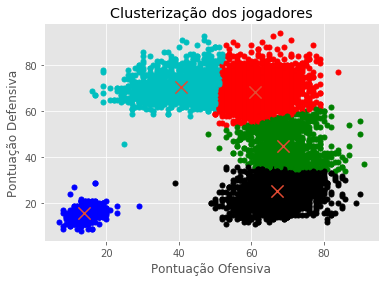

In [47]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.title("Clusterização dos jogadores")
plt.xlabel("Pontuação Ofensiva")
plt.ylabel("Pontuação Defensiva")
plt.show()

In [ ]:
#nesta primeira iteração do código final refinamos o banco de dados, utilizando apenas os jogadores de mais alto nível,
#a fim de conseguir resultados mais precisos.

In [52]:
lista_cluster=[]
for h in range(len(dados_filt)):
    w=[dados_filt.loc[h]['offensive_score'], dados_filt.loc[h]['defensive_score'], ]
    lista_cluster.append(w)

In [53]:
X=[]
for h in range(len(lista_cluster)):
    w=int(lista_cluster[h][0])
    j=int(lista_cluster[h][1])
    X.append([w, j])

#transformando em valores inteiros

In [54]:
kmeans = KMeans(n_clusters=5) #inicializa o número de clusters
kmeans.fit(X)   #"fit" da data (learning) 

centroids = kmeans.cluster_centers_ #pegando os valores das centroides do "fiting"
labels = kmeans.labels_ #labels que o programa deu 

print(centroids)
print(labels)

[[ 13.78611283  15.43087415]
 [ 63.87040205  42.29854577]
 [ 37.68331732  61.29298751]
 [ 60.32530846  23.12428528]
 [ 58.11866472  66.24634503]]
[1 3 3 ..., 2 3 0]


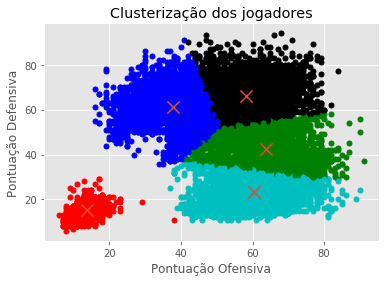

In [57]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.title("Clusterização dos jogadores")
plt.xlabel("Pontuação Ofensiva")
plt.ylabel("Pontuação Defensiva")
plt.show()

In [ ]:
# Em duas dimensões pode haver "confusão" de jogadores muito ruins parecerem goleiros, e goleiros muito bons em  outras
# áreas parecerem jogadores ofensivos ou defensivos de baixa qualidade.

# será novamente implementada uma terceira dimensão com a nota dos goleiros para evitar este tipo de erro e tornar o código
# muito mais preciso.

In [61]:
lista_cluster=[]
for h in range(len(dados_filt)):
    w=[dados_filt.loc[h]['offensive_score'], dados_filt.loc[h]['defensive_score'], dados_filt.loc[h]['gkscore']]
    lista_cluster.append(w)
    

In [62]:
X=[]
for h in range(len(lista_cluster)):
    w=int(lista_cluster[h][0])
    j=int(lista_cluster[h][1])
    t=int(lista_cluster[h][2])
    X.append([w, j, t])

In [63]:
kmeans = KMeans(n_clusters=5) #inicializa o número de clusters
kmeans.fit(X)   #"fit" da data (learning) 

centroids = kmeans.cluster_centers_ #pegando os valores das centroides do "fiting"
labels = kmeans.labels_ #labels que o programa deu 

print(centroids)
print(labels)

[[ 13.80185759  15.47616099  64.46377709]
 [ 63.65670996  42.73809524  10.34718615]
 [ 57.98787585  66.2742483   10.4085839 ]
 [ 60.48374704  23.27245863  10.30939716]
 [ 37.50814863  61.32040417  10.24837027]]
[1 3 3 ..., 4 3 0]


In [73]:
colors = ['red','green','blue','orange','yellow']

In [ ]:
# Aperfeiçoamento do método de clusterização:

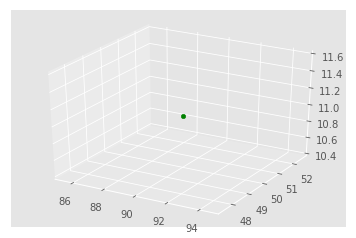

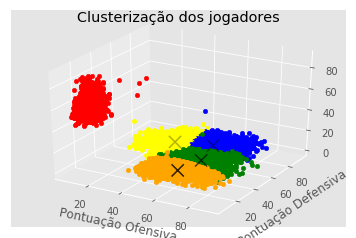

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):

    ax.scatter(X[i][0], X[i][1], X[i][2], color=colors[labels[i]])
    X[i].append(colors[labels[i]])


ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)


plt.title("Clusterização dos jogadores")
plt.xlabel("Pontuação Ofensiva")
plt.ylabel("Pontuação Defensiva")

plt.show()

In [79]:
posicao=[]
for h in range(len(X)):
    if X[h][3]=="red":
        posicao.append("GK")
    
    if X[h][3]=="green":
        posicao.append("meio-ataque")
    
    if X[h][3]=="yellow":
        posicao.append("defesa")
        
    if X[h][3]=="blue":
        posicao.append("meio-defesa")
    
    if X[h][3]=="orange":
        posicao.append("ataque")

In [84]:
dados_filt['posicao']=posicao

In [ ]:
for h in range(len(dados_filt)):
    if dados_filt[h][2]=="CF" or dados_filt[h][2]=="ST"
        

In [86]:
#comparando posições ao cluster para identificar precisão:
dados_filt.loc[(dados_filt.position=="ST") | (dados_filt.position=="CF") | (dados_filt.position=="RW") | (dados_filt.position=="LW") & (dados_filt.posicao=="ataque") ,"comparado"]="Certo"
dados_filt.loc[(dados_filt.position=="CAM") | (dados_filt.position=="LM") | (dados_filt.position=="RM") | (dados_filt.position=="CM") & (dados_filt.posicao=="meio-ataque") ,"comparado"]="Certo"
dados_filt.loc[(dados_filt.position=="CDM") | (dados_filt.position=="LWB") | (dados_filt.position=="RWB") & (dados_filt.posicao=="meio-defesa") ,"comparado"]="Certo"
dados_filt.loc[(dados_filt.position=="CB") | (dados_filt.position=="LB") | (dados_filt.position=="RB") & (dados_filt.posicao=="defesa") ,"comparado"]="Certo"
dados_filt.loc[(dados_filt.position=="GK") & (dados_filt.posicao=="GK") ,"comparado"]="Certo"

In [105]:
dados_filt=dados_filt.fillna(value="Errado")

In [113]:
dados_filt

,firstName,lastName,position,height,weight,acceleration,aggression,agility,ballcontrol,crossing,...,slidingtackle,gkdiving,gkhandling,Atk,Def,gkscore,offensive_score,defensive_score,posicao,comparado
0,Edson,Arantes Nascimento,CF,174,70,95,55,94,94,87,...,42,15,12,90.0,50.0,11.50,90.333333,50.333333,meio-ataque,Certo
1,C. Ronaldo,dos Santos Aveiro,LW,185,80,91,63,90,92,84,...,23,7,11,90.0,50.0,10.75,90.000000,24.666667,ataque,Certo
2,Lionel,Messi,RW,170,72,92,48,90,95,77,...,26,6,11,70.0,70.0,9.75,89.666667,20.333333,ataque,Certo
3,Franz,Beckenbauer,CB,181,75,83,63,80,89,64,...,91,14,14,90.0,70.0,12.50,66.333333,93.666667,meio-defesa,Certo
4,Paolo,Maldini,LB,187,85,87,66,65,72,83,...,94,10,6,70.0,90.0,9.50,68.666667,94.333333,meio-defesa,Certo
5,Franco,Baresi,CB,176,70,77,79,75,89,58,...,92,6,8,70.0,70.0,8.25,47.666667,93.666667,meio-defesa,Certo
6,Manuel,Neuer,GK,193,92,58,29,52,48,15,...,11,89,90,70.0,70.0,89.75,19.333333,17.000000,GK,Certo
7,Luis,Suárez,ST,182,85,88,78,86,91,77,...,38,27,25,90.0,70.0,30.50,85.666667,36.333333,meio-ataque,Certo
8,Neymar,da Silva Santos Jr.,LW,174,68,93,56,96,95,75,...,33,9,9,90.0,70.0,11.00,86.666667,30.000000,meio-ataque,Errado
9,Lothar,Matthäus,CDM,174,71,88,93,74,87,81,...,90,15,6,90.0,90.0,9.25,77.666667,89.333333,meio-defesa,Certo


In [130]:
x=dados_filt["comparado"].value_counts()

porct_acert=x/len(dados_filt)
porct_acert=porct_acert*100
porct_acert=porct_acert.round(decimals=2)

print("porcentagem de acerto do agrupamento:", porct_acert[0], "%")
print("porcentagem de erro do agrupamento:", porct_acert[1], "%")

porcentagem de acerto do agrupamento: 86.3 %
porcentagem de erro do agrupamento: 13.7 %


In [133]:
z=0
for h in range(len(dados_filt)):
    if dados_filt.iloc[h][2]=="CM" and dados_filt.iloc[h][31]=="Errado":
        z=z+1
porc_z=z*100/x[1]

Porcentagem de CM por erro de agrupamento 55.1585304479 %


In [135]:
porc_z=porc_z.round(decimals=2)

print("Porcentagem de CM por erro de agrupamento", porc_z, "%")
print("obs: mais da metade dos erros de clusterização foram em casos de jogadores da posição 'CM'")

Porcentagem de CM por erro de agrupamento 55.16 %
obs: mais da metade dos erros de clusterização foram em casos de jogadores da posição 'CM'


In [ ]:
# a posição que mais teve erro dada sua natureza foi "CM" (jogadores que jogam em qualquer posição do meio de campo)